In [1]:
import matplotlib.pyplot as plt 
import cv2
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

import warnings
warnings.filterwarnings("always")

<b><font size = 5>Multiclass KNN (BENIGN, BENIGN_WITHOUT_CALLBACK, MALIGNANT)</font></b>

In [2]:
calc_path = r"D:\VSC Workspace\breast_cancer_CNN\dataset\calcification"
mass_path = r"D:\VSC Workspace\breast_cancer_CNN\dataset\mass"

DIM = 224
def load_and_extract_features(directory, DIM):

    X = []
    y = []
    
    for label in os.listdir(directory):

        label_dir = os.path.join(directory, label)
        for filename in os.listdir(label_dir):

            image_path = os.path.join(label_dir, filename)

            img = cv2.imread(image_path)
            img_resized = cv2.resize(img, (DIM, DIM)) #og: (224, 224)
            img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

            X.append(img_gray.flatten())
            y.append(label)

    return X, y

In [3]:
calc_train_data, calc_train_targets = load_and_extract_features(calc_path + r"\train\cropped_files", DIM)
calc_test_data, calc_test_targets = load_and_extract_features(calc_path + r"\test\cropped_files", DIM)

mass_train_data, mass_train_targets = load_and_extract_features(mass_path + r"\train\cropped_files", DIM)
mass_test_data, mass_test_targets = load_and_extract_features(mass_path + r"\test\cropped_files", DIM)

<b><font size = 3>Testing for Optimal n_neighbors:</font></b>

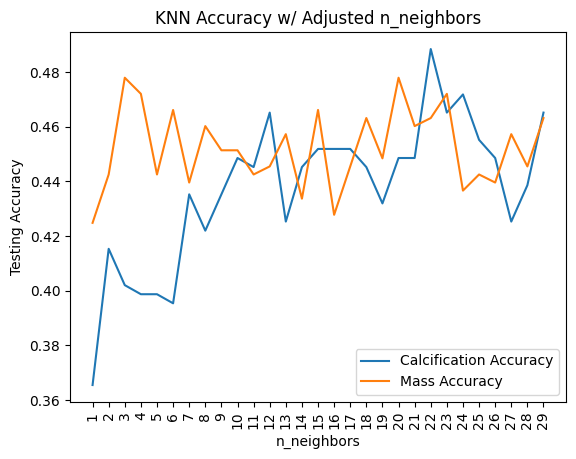

In [4]:
neighbors_values = [x for x in range(1, 30)] 
calc_accuracies = []
mass_accuracies = []

for x in neighbors_values:

    calc_knn = KNeighborsClassifier(n_neighbors = x)
    calc_knn.fit(calc_train_data, calc_train_targets)

    calc_y_pred = calc_knn.predict(calc_test_data)
    calc_accuracies.append(accuracy_score(calc_y_pred, calc_test_targets))


    mass_knn = KNeighborsClassifier(n_neighbors = x)
    mass_knn.fit(mass_train_data, mass_train_targets)   

    mass_y_pred = mass_knn.predict(mass_test_data)
    mass_accuracies.append(accuracy_score(mass_y_pred, mass_test_targets))

plt.plot(neighbors_values, calc_accuracies)
plt.plot(neighbors_values, mass_accuracies)
plt.legend(["Calcification Accuracy", "Mass Accuracy"])
plt.xlabel("n_neighbors")
plt.ylabel("Testing Accuracy")
plt.title("KNN Accuracy w/ Adjusted n_neighbors")
plt.xticks(neighbors_values, rotation = 90)
plt.show()

In [5]:
top_calc_accuracies = sorted(zip(calc_accuracies, neighbors_values), reverse = True)
opt_nneighbors_calc = top_calc_accuracies[0][1]
print(f"Optimal n_neighbors for Calcification Model: {opt_nneighbors_calc}")

top_mass_accuracies = sorted(zip(mass_accuracies, neighbors_values), reverse = True)
opt_nneighbors_mass = top_mass_accuracies[0][1]
print(f"Optimal n_neighbors for Mass Model: {opt_nneighbors_mass}")

Optimal n_neighbors for Calcification Model: 22
Optimal n_neighbors for Mass Model: 20


In [6]:
calc_knn = KNeighborsClassifier(n_neighbors = opt_nneighbors_calc)
calc_knn.fit(calc_train_data, calc_train_targets)

mass_knn = KNeighborsClassifier(n_neighbors = opt_nneighbors_mass)
mass_knn.fit(mass_train_data, mass_train_targets)

KNeighborsClassifier(n_neighbors=20)

In [7]:
calc_y_pred = calc_knn.predict(calc_test_data)
calc_confusion = confusion_matrix(calc_y_pred, calc_test_targets)

mass_y_pred = mass_knn.predict(mass_test_data)
mass_confusion = confusion_matrix(calc_y_pred, calc_test_targets)

<b><font size = 3>Multiclass Results:</b></font>

In [8]:
print(f"Calcification KNN Model Accuracy: {accuracy_score(calc_y_pred, calc_test_targets)} \n")
print(classification_report(calc_y_pred, calc_test_targets))

Calcification KNN Model Accuracy: 0.4883720930232558 

                         precision    recall  f1-score   support

                 BENIGN       0.53      0.49      0.51       127
BENIGN_WITHOUT_CALLBACK       0.70      0.44      0.54       107
              MALIGNANT       0.32      0.57      0.41        67

               accuracy                           0.49       301
              macro avg       0.52      0.50      0.49       301
           weighted avg       0.55      0.49      0.50       301



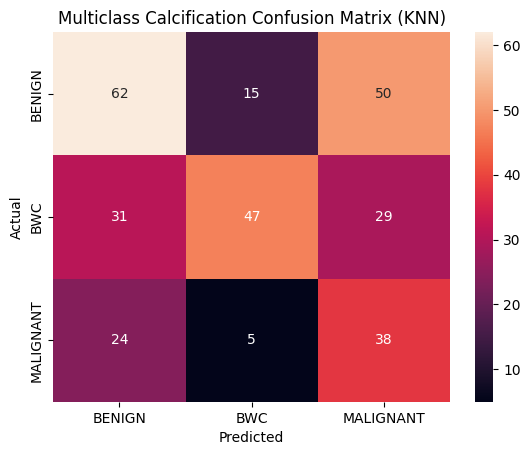

In [9]:
labels = calc_knn.classes_
labels[1] = "BWC"

sns.heatmap(calc_confusion, annot = True, xticklabels= labels, yticklabels = labels, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Multiclass Calcification Confusion Matrix (KNN)")
plt.show()

In [10]:
print(f"Mass KNN Model Accuracy: {accuracy_score(mass_y_pred, mass_test_targets)} \n")
print(classification_report(mass_y_pred, mass_test_targets, zero_division = 0))

Mass KNN Model Accuracy: 0.4778761061946903 

                         precision    recall  f1-score   support

                 BENIGN       0.51      0.52      0.52       161
BENIGN_WITHOUT_CALLBACK       0.00      0.00      0.00         3
              MALIGNANT       0.57      0.45      0.50       175

               accuracy                           0.48       339
              macro avg       0.36      0.32      0.34       339
           weighted avg       0.54      0.48      0.50       339



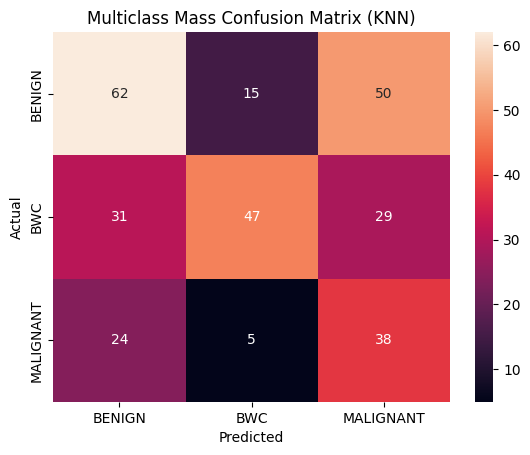

In [11]:
labels = mass_knn.classes_
labels[1] = "BWC"

sns.heatmap(mass_confusion, annot = True, xticklabels= labels, yticklabels = labels, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Multiclass Mass Confusion Matrix (KNN)")
plt.show()

<b><font size = 5>Binary KNN (BENIGN, MALIGNANT)</font></b>

In [12]:
calc_path = r"D:\VSC Workspace\breast_cancer_CNN\cropped_dataset\calcification"
mass_path = r"D:\VSC Workspace\breast_cancer_CNN\cropped_dataset\mass"

DIM = 224
def load_and_extract_features(directory, DIM):

    X = []
    y = []
    
    for label in os.listdir(directory):

        label_dir = os.path.join(directory, label)
        for filename in os.listdir(label_dir):

            image_path = os.path.join(label_dir, filename)

            img = cv2.imread(image_path)
            img_resized = cv2.resize(img, (DIM, DIM)) #og: (224, 224)
            img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

            X.append(img_gray.flatten())
            y.append(label)

    return X, y

In [13]:
calc_train_data, calc_train_targets = load_and_extract_features(calc_path + r"\train", DIM)
calc_test_data, calc_test_targets = load_and_extract_features(calc_path + r"\test", DIM)

mass_train_data, mass_train_targets = load_and_extract_features(mass_path + r"\train", DIM)
mass_test_data, mass_test_targets = load_and_extract_features(mass_path + r"\test", DIM)

<b><font size = 3>Testing for Optimal n_neighbors:</font></b>

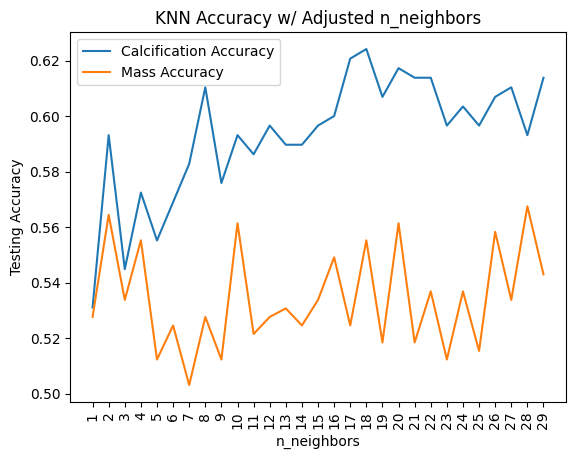

In [14]:
neighbors_values = [x for x in range(1, 30)] 
calc_accuracies = []
mass_accuracies = []

for x in neighbors_values:

    calc_knn = KNeighborsClassifier(n_neighbors = x)
    calc_knn.fit(calc_train_data, calc_train_targets)

    calc_y_pred = calc_knn.predict(calc_test_data)
    calc_accuracies.append(accuracy_score(calc_y_pred, calc_test_targets))

    mass_knn = KNeighborsClassifier(n_neighbors = x)
    mass_knn.fit(mass_train_data, mass_train_targets)   

    mass_y_pred = mass_knn.predict(mass_test_data)
    mass_accuracies.append(accuracy_score(mass_y_pred, mass_test_targets))

plt.plot(neighbors_values, calc_accuracies)
plt.plot(neighbors_values, mass_accuracies)
plt.legend(["Calcification Accuracy", "Mass Accuracy"])
plt.xlabel("n_neighbors")
plt.ylabel("Testing Accuracy")
plt.title("KNN Accuracy w/ Adjusted n_neighbors")
plt.xticks(neighbors_values, rotation = 90)
plt.show()

In [15]:
top_calc_accuracies = sorted(zip(calc_accuracies, neighbors_values), reverse = True)
opt_nneighbors_calc = top_calc_accuracies[0][1]
print(f"Optimal n_neighbors for Calcification Model: {opt_nneighbors_calc}")

top_mass_accuracies = sorted(zip(mass_accuracies, neighbors_values), reverse = True)
opt_nneighbors_mass = top_mass_accuracies[0][1]
print(f"Optimal n_neighbors for Mass Model: {opt_nneighbors_mass}")

Optimal n_neighbors for Calcification Model: 18
Optimal n_neighbors for Mass Model: 28


In [16]:
calc_knn = KNeighborsClassifier(n_neighbors = opt_nneighbors_calc)
calc_knn.fit(calc_train_data, calc_train_targets)

mass_knn = KNeighborsClassifier(n_neighbors = opt_nneighbors_mass)
mass_knn.fit(mass_train_data, mass_train_targets)

KNeighborsClassifier(n_neighbors=28)

In [17]:
calc_y_pred = calc_knn.predict(calc_test_data)
calc_confusion = confusion_matrix(calc_y_pred, calc_test_targets)

mass_y_pred = mass_knn.predict(mass_test_data)
mass_confusion = confusion_matrix(mass_y_pred, mass_test_targets)

<b><font size = 3>Binary Results:</b></font>

In [18]:
print(f"Calcification KNN Model Accuracy: {accuracy_score(calc_y_pred, calc_test_targets)} \n")
print(classification_report(calc_y_pred, calc_test_targets))

Calcification KNN Model Accuracy: 0.6241379310344828 

              precision    recall  f1-score   support

      BENIGN       0.83      0.64      0.72       222
   MALIGNANT       0.32      0.56      0.41        68

    accuracy                           0.62       290
   macro avg       0.58      0.60      0.57       290
weighted avg       0.71      0.62      0.65       290



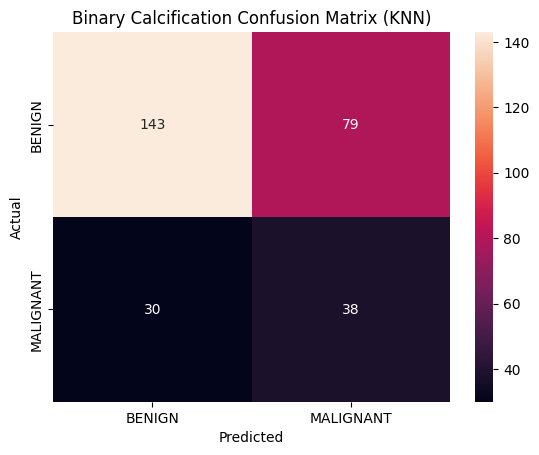

In [19]:
labels = calc_knn.classes_

sns.heatmap(calc_confusion, annot = True, xticklabels= labels, yticklabels = labels, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Binary Calcification Confusion Matrix (KNN)")
plt.show()

In [20]:
print(f"Mass KNN Model Accuracy: {accuracy_score(mass_y_pred, mass_test_targets)} \n")
print(classification_report(mass_y_pred, mass_test_targets, zero_division = 0))

Mass KNN Model Accuracy: 0.5674846625766872 

              precision    recall  f1-score   support

      BENIGN       0.59      0.64      0.61       174
   MALIGNANT       0.54      0.49      0.51       152

    accuracy                           0.57       326
   macro avg       0.56      0.56      0.56       326
weighted avg       0.57      0.57      0.57       326



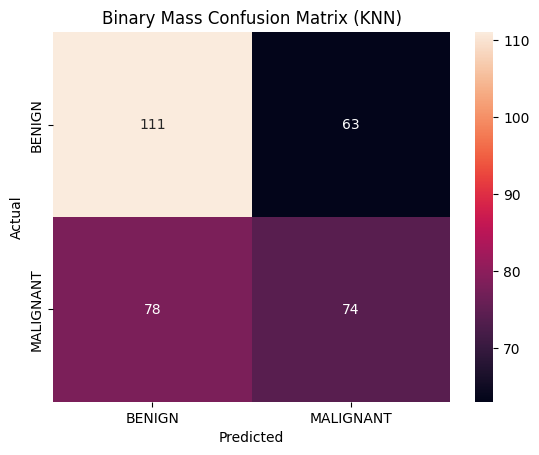

In [21]:
labels = mass_knn.classes_

sns.heatmap(mass_confusion, annot = True, xticklabels= labels, yticklabels = labels, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Binary Mass Confusion Matrix (KNN)")
plt.show()